In [59]:
import json
import uuid
from IPython.display import display_javascript, display_html, display

flot_html= '<div name="%s" id="%s" style="height: 300px; width:90percent;"></div>'
flot_js = """
require(["https://cdnjs.cloudflare.com/ajax/libs/flot/0.8.2/jquery.flot.min.js"], function() {
    var myjson_js2 = '{ "label": "line1", "data": [["1.3", "5"],["0.7", "12"]] }';
    var myjson = '%s'
  var line = JSON.parse(myjson);
  $.plot("#%s", [line]);
  }); """

class MyGen(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def generate(self):
        return [[x,y] for x,y in zip(self.x, self.y)]

class JQueryFlot(object):
    def __init__(self, df):
        self.uuid = str(uuid.uuid4())
        #self.json_data = '{ "label": "line1", "data": %s }' % (xy)        
        self.json_data = df      
    
    def _ipython_display_(self):
        display_html(flot_html %(self.uuid, self.uuid), raw=True)        
        display_javascript(flot_js % (self.json_data, self.uuid), raw=True)
        
import numpy as np
x = np.linspace(0,10)
y = np.sin(x)
df = MyGen(x,y).generate()
JQueryFlot(df)

In [60]:
import json
import uuid
import base64
import numpy as np
from IPython.display import display_javascript, display_html, display

class ComplexEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, list):
            return obj.toJSON()
        else:
            return json.JSONEncoder.default(self, obj)

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        """If obj is an ndarray it will be converted into a dict holding dtype, shape and the data, base64 encoded."""
        if isinstance(obj, np.ndarray):
            if obj.flags['C_CONTIGUOUS']:
                obj_data = obj.data
            else:
                cont_obj = np.ascontiguousarray(obj)
                assert(cont_obj.flags['C_CONTIGUOUS'])
                obj_data = cont_obj.data
            data_b64 = base64.b64encode(obj_data)
            return dict(__ndarray__=data_b64,
                        dtype=str(obj.dtype),
                        shape=obj.shape)
        # Let the base class default method raise the TypeError
        return json.JSONEncoder(self, obj)

class NumpyAwareJSONEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray) and obj.ndim == 1:
                return obj.tolist()
        elif isinstance(obj, np.generic):
            return obj.item()
        return json.JSONEncoder.default(self, obj)

def json_numpy_obj_hook(dct):
    """Decodes a previously encoded numpy ndarray with proper shape and dtype.
    :param dct: (dict) json encoded ndarray
    :return: (ndarray) if input was an encoded ndarray
    """
    if isinstance(dct, dict) and '__ndarray__' in dct:
        data = base64.b64decode(dct['__ndarray__'])
        return np.frombuffer(data, dct['dtype']).reshape(dct['shape'])
    return dct

#expected = np.arange(10, dtype=np.float)
#dumped = json.dumps(expected, cls=ComplexEncoder)
#result = json.loads(dumped, object_hook=json_numpy_obj_hook)
        
x = np.linspace(0,10)
y = np.sin(x)
df = MyGen(x,y).generate()
JQueryFlot(df)

In [2]:
from IPython.display import Javascript, HTML
from IPython.display import display_javascript, display_html, display
import numpy as np
import json 

def arr2json(arr):
    return json.dumps(arr)
def json2arr(astr,dtype):
    return np.fromiter(json.loads(astr),dtype)

x = [1,2,3,4,5]
y = [5,6,7,8,9]
arr2=np.array([x,y])
arr=np.arange(10)
arr2=arr2json(arr2.tolist())
print(repr(arr2))

#loader='<script src="https://d3js.org/d3.v7.min.js"></script>'
#display_html(loader)
display_javascript("""
require.config({paths: {d3: "https://d3js.org/d3.v7.min.js"}});
require(["d3"], function(d3) {
    d3.select("body").style("background-color", "black");
    console.log(d3.version);
});""")

'[[1, 2, 3, 4, 5], [5, 6, 7, 8, 9]]'


In [21]:
from IPython.core.display import HTML
HTML(''' <h1>Hello DOM!</h1> ''')

In [30]:
%%javascript
element.append("<div id='chart1'>d3</div>");
require.config({paths: {d3: "//cdnjs.cloudflare.com/ajax/libs/d3/3.5.3/d3.js"}});
console.log("d3 version: ", d3.version)

<IPython.core.display.Javascript object>

In [22]:
from IPython.display import display_javascript, display_html, display
# const d3 = require(['d3']);
HTML('<script src="https://d3js.org/d3.v7.min.js"></script>')
HTML("<script>d3.select('body').style('background-color', 'black');</script>")

In [18]:
%%html
<script data-require="d3@3.5.3" data-semver="3.5.3" src="//cdnjs.cloudflare.com/ajax/libs/d3/3.5.3/d3.js"></script>
<div id="d3">abcd</div>

In [19]:
%%javascript
var width = window.innerWidth;
var height = window.innerHeight;

    var svg = d3.select("#d3").append("svg")
      .attr("width", width)
      .attr("height", height);
      
svg.append("rect")
  .attr("width",width)
  .attr("height",height)
  .style("fill","steelblue");

<IPython.core.display.Javascript object>

In [21]:
from IPython.core.display import display, HTML
from string import Template
import json

HTML(''' ''')

css_text = ''' '''

js_text_template = Template('''
        var bogoSVG = d3.select("#$bogoanimation") 
          .append("svg")
          .attr("width", 300)
          .attr("height", 300);
        bogoSVG.style("background-color", "black");

      var data = $python_data ;
       bogoSVG.append("circle")
          .style("stroke", "gray")
          .style("fill", "cyan")
          .attr("r", data[0]['r'])
          .attr("cx", data[0]['cx'])
          .attr("cy", data[0]['cy'])
          .transition()
             .delay(100)
             .duration(10000)  
             .attr("r", 10)
             .attr("cx", data[0]['cx'])
             .style("fill", "blue");
''')

html_template = Template('''
$css_text
<div class="legend">SVG circle with animation:</div>   
<div id="animation"></div>
<script>
$js_text
</script>
''')

js_text = js_text_template.substitute({'python_data': json.dumps([{'r': 130, 'cx': 150, 'cy': 150}]),
                                       'bogoanimation': 'animation'})
full = html_template.substitute({'css_text': css_text, 'js_text': js_text})
HTML(full)

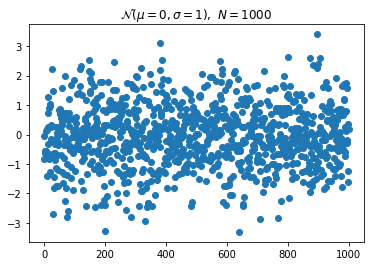

In [45]:
from IPython.display import display
from IPython.core.pylabtools import print_figure
from IPython.display import Image, SVG, Math
import matplotlib.pyplot as plt

class Gaussian(object):
    """A simple object holding data sampled from a Gaussian distribution. """
    def __init__(self, mean=0, std=1, size=1000):
        self.data = np.random.normal(mean, std, size)
        self.mean = mean
        self.std = std
        self.size = size
        # For caching plots that may be expensive to compute
        self._png_data = None
        self._svg_data = None
        
    def _figure_data(self, format):
        fig, ax = plt.subplots()
        ax.plot(self.data, 'o')
        ax.set_title(self._repr_latex_())
        data = print_figure(fig, format)
        # We MUST close the figure, otherwise IPython's display machinery
        # will pick it up and send it as output, resulting in a double display
        plt.close(fig)
        return data
    
    # Here we define the special repr methods that provide the IPython display protocol
    # Note that for the two figures, we cache the figure data once computed.
    
    def _repr_png_(self):
        if self._png_data is None:
            self._png_data = self._figure_data('png')
        return self._png_data


    def _repr_svg_(self):
        if self._svg_data is None:
            self._svg_data = self._figure_data('svg').decode('utf-8')#.encode('utf-8')
        return self._svg_data
    
    def _repr_latex_(self):
        return r'$\mathcal{N}(\mu=%.2g, \sigma=%.2g),\ N=%d$' % (self.mean,
                                                                 self.std, self.size)
    
    # We expose as properties some of the above reprs, so that the user can see them
    # directly (since otherwise the client dictates which one it shows by default)
    @property
    def png(self):
        return Image(self._repr_png_(), embed=True)
    
    @property
    def svg(self):
        return SVG(self._repr_svg_())
        
    @property
    def latex(self):
        return Math(self._repr_latex_())
    
    # An example of using a property to display rich information, in this case
    # the histogram of the distribution.  We've hardcoded the format to be png
    # in this case, but in production code it would be trivial to make it an option
    @property
    def hist(self):
        fig, ax = plt.subplots()
        ax.hist(self.data, bins=100)
        ax.set_title(self._repr_latex_())
        data = print_figure(fig, 'png')
        plt.close(fig)
        return Image(data, embed=True)

g = Gaussian()
g.png

In [8]:
import json
import uuid
from IPython.display import display_javascript, display_html, display

class ThreeJSFlot(object):
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def _ipython_display_(self):
        #print(self.x, self.y)
        xy = json.dumps([[x,y,z] for x,y,z in zip(self.x, self.y, self.z)])
        json_data = '{ "data": %s }' % (xy)
        
        display_html('<canvas id="myCanvas" width=768 height=400 style="width:768px;height:400px;left: 0px; top: 0px; padding: 0px;margin: 0px;position: static;"></canvas>', raw=True)
        
        jscode = """
        var mesh, camera, scene, light, renderer, raycaster, mouse, intersects;
        var bgMesh, bgTexture, bgScene, bgCam;
        var exportButton, floatingDiv, info;
        var mouseX = 0, mouseY = 0;
        var count = 0;
        var objects = [];
        var ip = location.host;
        console.log(ip);
        var mycontainer = "myCanvas";
        var myCanvas = document.getElementById(mycontainer);
        
        //var myWidth = myCanvas.offsetWidth; //offsetWidth
        //var myHeight = myCanvas.offsetHeight; //offsetHeight
        var myWidth = myCanvas.clientWidth;
        var myHeight = myCanvas.clientHeight;
        
        floatingDiv = document.createElement( 'div' );
        floatingDiv.className = 'floating';
        myCanvas.appendChild( floatingDiv );

        info = document.createElement( 'div' );
        info.className = 'info77';
        info.style.position = 'absolute';
        info.style.display = 'block';
        info.style.top = '30px';
        info.style.left = '180px';
        info.style.width = '100%';
        info.style.textAlign = 'center';
        info.style.color = '#f00';
        info.style.backgroundColor = 'transparent';
        info.style.zIndex = '1000';
        info.style.fontFamily = 'Monospace';
        info.innerHTML = 'Hits: ' + count;
        info.style.userSelect = "none";
        info.style.webkitUserSelect = "none";
        info.style.MozUserSelect = "none";
        myCanvas.parentElement.appendChild( info );
        
        """
        
        code2 = """
        
        function addGeometry( type ) {

        for( var i = 0; i < scene.children.length; i++ ) {
            var current = scene.children[ i ];

            if( current instanceof THREE.Mesh ) {
                current.geometry.dispose();
                scene.remove( current );
                i--;
                }
            }

        if ( type === 1 ) {

            var material = new THREE.MeshLambertMaterial( { color : 0xf0cc00 } );

            var geometry = new THREE.Geometry();
            geometry.vertices.push( new THREE.Vector3( -50, -50, 0 ) );
            geometry.vertices.push( new THREE.Vector3(  50, -50, 0 ) );
            geometry.vertices.push( new THREE.Vector3(  50,  50, 0 ) );
            var face = new THREE.Face3( 0, 1, 2 );
            geometry.faces.push( face );
            geometry.computeFaceNormals();

            scene.add( new THREE.Mesh( geometry, material ) );
            objects.push( mesh );

        } else if ( type === 2 ) {
            var material = new THREE.MeshLambertMaterial( { color : 0x00cc00 } );
            var plane = new THREE.Mesh(new THREE.PlaneBufferGeometry(300, 300), material);
            plane.overdraw = true;
            scene.add(plane);   
        } else if ( type == 3) {            
            var material = new THREE.MeshLambertMaterial( { color : 0xf0cc00 } );
            var geometry = new THREE.Geometry();
            
            var myvertexlist = [];
            var x,y,z;
            var myjson = JSON.parse('%s');
            console.log(myjson);
            var count = Object.keys(myjson.data).length;
            for( var i = 0; i < count; i++ ) {
                x = myjson.data[i][0];
                y = myjson.data[i][1];
                z = myjson.data[i][2];
                myvertexlist.push([x, y, z]);
            }
            
            //console.log(myvertexlist);
            for (var i = 0; i< Object.keys(myvertexlist).length; i++) {
                geometry.vertices.push( new THREE.Vector3( myvertexlist[i][0], myvertexlist[i][1], myvertexlist[i][2] + scene.children.length*50 ) );
            }
            
            //for (var i = 0; i< Object.keys(myvertexlist).length; i++) {
            var face = new THREE.Face3( 0, 1, 2 );
            //}
            
            geometry.faces.push( face );
            geometry.computeFaceNormals();
            mesh = new THREE.Mesh( geometry, material );
            scene.add( mesh );
            objects.push( mesh );
        } else if (type == 4 ) {
            mesh = new THREE.Mesh( 
                new THREE.BoxGeometry( 10, 10, 10, 1, 1, 1), 
                new THREE.MeshPhongMaterial( { color : 0x0080ff } ) );
            scene.add( mesh );
            objects.push( mesh );
            
        } else if ( type == 0 ) {
            // Load the background texture
            bgTexture = THREE.ImageUtils.loadTexture( 'http://' + ip +'/static/diego/StonehengeSun_alexander_4200.jpg' );
            bgTexture.minFilter = THREE.LinearFilter;//here is the filter
            
            var groundBump = THREE.ImageUtils.loadTexture('http://' + ip +'/static/diego/OmegaCentaresSouthernSky.jpg');
            groundBump.minFilter = THREE.LinearFilter;//here is the filter
            //groundBump.wrapS = THREE.ClampToEdgeWrapping;
            //groundBump.wrapT = THREE.ClampToEdgeWrapping; //THREE.RepeatWrapping

            var groundMat = new THREE.MeshPhongMaterial( { map: bgTexture, bumpMap: groundBump, color: 0x957D69 } );
            //groundMat.map.repeat.set(12,8);

            bgMesh = new THREE.Mesh( new THREE.PlaneBufferGeometry( 2, 2, 0,0,0 ), groundMat);
            //bgMesh.rotation.set(-90 * (3.14/180), 0, 0, 'XYZ');
            
            // The bg plane shouldn't care about the z-buffer.
            //bgMesh.material.depthTest = false;
            bgMesh.material.depthWrite = false;
            
            bgScene = new THREE.Scene();
            bgCam = new THREE.Camera();            

            var light2 = new THREE.AmbientLight( 0xffffff );
            light2.position.set(1,1,1);
            light2.castShadow = false;
            
            bgScene.add( light2 );            
            bgScene.add(bgMesh);            
            bgScene.add(bgCam);
        }
        }
        """ % (json_data)
        code3 = """
            function init() {
                        
            renderer = new THREE.WebGLRenderer({ canvas: myCanvas, alpha: false, antialiasing: false, stencil: true});
            //renderer.setPixelRatio( window.devicePixelRatio );
            renderer.setSize(myWidth, myHeight);
                                    
            scene = new THREE.Scene();
            raycaster = new THREE.Raycaster();
            mouse = new THREE.Vector2();

            camera = new THREE.PerspectiveCamera(45, myWidth / myHeight, 1, 1000 );
            camera.position.x =0;
            camera.position.y = 0;
            camera.position.z = 100;
            camera.lookAt(scene.position);
            
            light = new THREE.DirectionalLight( 0xffffff );
            light.position.set(100, 100, 100);
            scene.add( light );
            
            addGeometry( 0 );
            //addGeometry( 1 ); 
            //addGeometry( 2 ); 
            //addGeometry( 3 );                        
            addGeometry( 4 );                        
            

            //window.addEventListener( 'click', onWindowClick, false );
            //myCanvas.addEventListener( 'resize', onWindowResize, false );
            window.addEventListener( 'mousemove', onDocumentMouseMove, false );
            //myCanvas.addEventListener( 'mouseover', onDocumentMouseMove, false );
            myCanvas.addEventListener( 'mousedown', onDocumentMouseDown, false );

            }
            """

        code4 = """
        
        function onWindowClick( event ) {
            var needToClose = true;
            var target = event.target;
            
            while( target !== null ) {
                if ( target === floatingDiv || target === exportButton ) {
                    needToClose = false;
                    break;
                }
                target = target.parentElement;
            }

            if ( needToClose ) { floatingDiv.style.display = 'none'; }
        }

        function onWindowResize(){
            camera.aspect = myWidth / myHeight;
            camera.updateProjectionMatrix();
            renderer.setSize( myWidth, myHeight );
        }
        
        function switchCamera(SCENE_WIDTH, SCENE_HEIGHT) {
            if (camera instanceof THREE.PerspectiveCamera) {
                camera = new THREE.OrthographicCamera( SCENE_WIDTH / - 2, SCENE_WIDTH / 2, SCENE_HEIGHT / 2, SCENE_HEIGHT / - 2, 0.1, 1000 );
                camera.position.x = 0;
                camera.position.y = 0;
                camera.position.z = -1;
                camera.lookAt(scene.position);
                this.perspective = "Orthographic";
                } else {
                camera = new THREE.PerspectiveCamera( 45, myCanvas.innerWidth / myCanvas.innerHeight, 1, 1000 );
                camera.position.x = 0;
                camera.position.y = 0;
                camera.position.z = 10;
                camera.lookAt(scene.position);
            }
            }
            
        function onDocumentMouseDown() {
            raycaster.setFromCamera( mouse, camera );
            intersects = raycaster.intersectObjects(object);

            if ( intersects.length > 0 ) {
                info.innerHTML = 'Hits: ' + ++count;
                console.log(left-event.clientX- myCanvas.offsetLeft*2, mouseX,myCanvas.clientWidth, camera.position.x, mesh.position.x)
            }
            }

        function onDocumentMouseMove( event ) {
            var off = 1;
            var windowHalfX = myCanvas.clientWidth/2;
            var windowHalfY = myCanvas.clientHeight/2;
                        
            //mouseX = ( ( event.clientX - myCanvas.offsetLeft ) / myCanvas.clientWidth ) * 2 ;            
            //mouseY = - ( ( event.clientY - myCanvas.offsetTop ) / myCanvas.clientHeight ) * 2;            
            mouseX = ( event.clientX - windowHalfX ) / off;
            mouseY = -( event.clientY - windowHalfY ) / off;
        }

        function animate() {
            requestAnimationFrame( animate );
            camera.position.x += ( -mouseX - camera.position.x) *1.8;
            camera.position.y += ( -mouseY - camera.position.y ) *0.8;
            
            //mesh.position.x = ( mouseX)*2;
            //mesh.position.y = ( mouseY)*2;
            
            camera.lookAt( mesh.position );
            //bgCam.lookAt( bgScene.position );
            //bgCam.position.set( 0, 0, 0);

            light.position.set( camera.position.x, camera.position.y, camera.position.z ).normalize();
            
            renderer.autoClear = false;
            renderer.clear();               
            renderer.render( bgScene, bgCam );   
            renderer.render( scene, camera );
        }

        init();
        animate();
        
         """
        mythree_r80 = "http://threejs.org/build/three.js"
        mythree_r71 = "https://cdnjs.cloudflare.com/ajax/libs/three.js/r71/three.min.js"
        myjavascriptcode = """require(["%s"], 
            function(){ %s %s %s %s});""" % (mythree_r80, jscode,code2, code3, code4)
        
        display_javascript("""require(["https://cdnjs.cloudflare.com/ajax/libs/three.js/r71/three.min.js"], function(){});""",raw=True)
        display_javascript(myjavascriptcode, raw=True)

ThreeJSFlot([-50,-50,0],[50,-50,0],[50,50,0])

In [1]:
import networkx as nx
G=nx.Graph()
G.add_node("spam")
G.add_edge(1,2)
print(G.nodes())
print(G.edges())

['spam', 1, 2]
[(1, 2)]


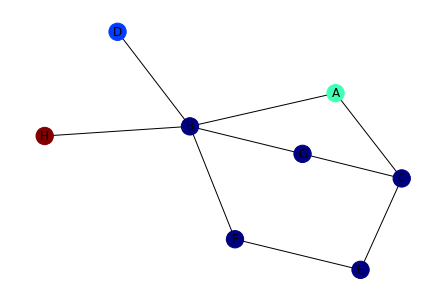

In [63]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 2.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values, with_labels = True)
plt.show()